## Title: Customer Transactions

#### Data Analyzed by: Kwabena Boateng

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

#### LOAD DATASET

In [2]:
customer_transactions = pd.read_csv("C:/Users/KWABENABOATENG/Desktop/DATA ANALYSIS/PERSONAL/CUSTOMER TRANSACTIONS PROJECT/sample_dataset.csv")

customer_transactions.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics


#### DATA UNDERSTANDING AND PREPARATION

In [3]:
print('The number of rows and columns in this dataset is', customer_transactions.shape, 'respectively')

The number of rows and columns in this dataset is (50000, 9) respectively


#### THE OVERALL STRUCTURE OF THE DATASET

In [4]:
customer_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Surname             50000 non-null  object 
 3   Gender              44953 non-null  object 
 4   Birthdate           50000 non-null  object 
 5   Transaction Amount  50000 non-null  float64
 6   Date                50000 non-null  object 
 7   Merchant Name       50000 non-null  object 
 8   Category            50000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


#### CHECK FOR MISSING VALUES

In [5]:
customer_transactions.isna().sum()

Customer ID              0
Name                     0
Surname                  0
Gender                5047
Birthdate                0
Transaction Amount       0
Date                     0
Merchant Name            0
Category                 0
dtype: int64

In [6]:
Total_MV = customer_transactions.isna().sum().sum()
print('The total number of missing values in this dataset is', Total_MV)

The total number of missing values in this dataset is 5047


#### INSIGHTS

From the above charts and results, it shows clearly that the Gender column is the only column with missing values.

#### CHECK FOR DUPLICATE ROWS

In [7]:
Total_dup = customer_transactions.duplicated().sum()
print('The total number of duplicate rows in this dataset is', Total_dup)

The total number of duplicate rows in this dataset is 0


#### DEALING WITH THE MISSING VALUES IN THE GENDER COLUMN

In [8]:
#Check for the percentage for the missing values.

missing_gender = customer_transactions['Gender'].isnull().sum()
total_rows = len(customer_transactions)
missing_percentage = (missing_gender / total_rows) * 100

print(f"Missing Gender Values: {missing_gender} ({missing_percentage:.2f}%)")

Missing Gender Values: 5047 (10.09%)


#### INSIGHTS

Due to the percentage of the missing values in the Gender columns, we can't afford to delete those rows.
We will rather replace the missing values with NOT SURE.
This presupposes that these customers didn't have the option to select their preferred gender hence they left that field empty.
After this, we can now encode our Gender column.

In [9]:
customer_transactions['Gender'].fillna('Not Sure', inplace=True)

In [10]:
customer_transactions['Gender'] = customer_transactions['Gender'].replace('M', 'Male')
customer_transactions['Gender'] = customer_transactions['Gender'].replace('F', 'Female')

In [11]:
customer_transactions.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,Female,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,Not Sure,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,Male,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,Male,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,Female,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics


#### EXPLORATORY DATA ANALYSIS, (E.D.A)

#### MAKE A COPY OF THE ORIGINAL DATASET.

In [12]:
customer_transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,50000.0,500136.796960,288232.431640,29.00,251191.5000,499520.500,749854.250,999997.00
Transaction Amount,50000.0,442.119239,631.669724,5.01,79.0075,182.195,470.515,2999.88


In [13]:
customer_transactions.describe(include='object').T

,count,unique,top,freq
Name,50000,690,Michael,1167
Surname,50000,1000,Smith,1095
Gender,50000,3,Female,22713
Birthdate,50000,58,1954-11-01,914
Date,50000,287,2023-06-30,200
Merchant Name,50000,36939,Smith Ltd,69
Category,50000,6,Restaurant,8413


In [14]:
customer_transactions_copy = customer_transactions.copy

In [15]:
Cols_drop = ['Customer ID', 'Surname']
customer_transactions = customer_transactions.drop(columns= Cols_drop)

In [16]:
customer_transactions.head()

,Name,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,Sean,Female,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,Michelle,Not Sure,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,Jacob,Male,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,Nathan,Male,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,Crystal,Female,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics


#### PLOT A GRAPH FOR THE VARIOUS GENDER

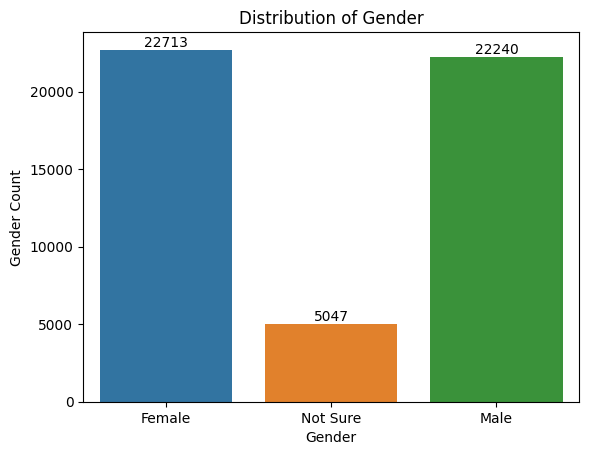

In [17]:
ax = sns.countplot(customer_transactions, x='Gender')

for bars in ax.containers:
    
      ax.bar_label(bars)
        
plt.title('Distribution of Gender')

plt.ylabel('Gender Count')

plt.show()

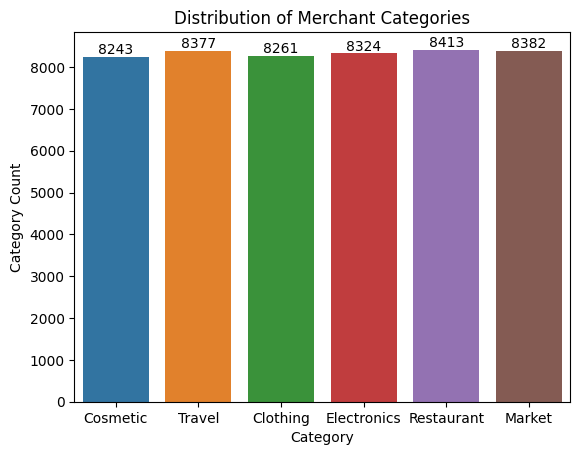

In [18]:
ax = sns.countplot(customer_transactions, x='Category')

for bars in ax.containers:
    
      ax.bar_label(bars)
        
plt.title('Distribution of Merchant Categories')

plt.ylabel('Category Count')

plt.show()

#### SHOW A SUMMARY STATISTICS OF THE AGE GROUP IN THE DATASET

In [19]:
summary_stats = customer_transactions['Birthdate'].describe()
print(summary_stats)

count          50000
unique            58
top       1954-11-01
freq             914
Name: Birthdate, dtype: object


#### CONVERT THE BIRTHDATE INTO A DATETIME TO PLOT IT OUT AS A GRAPH

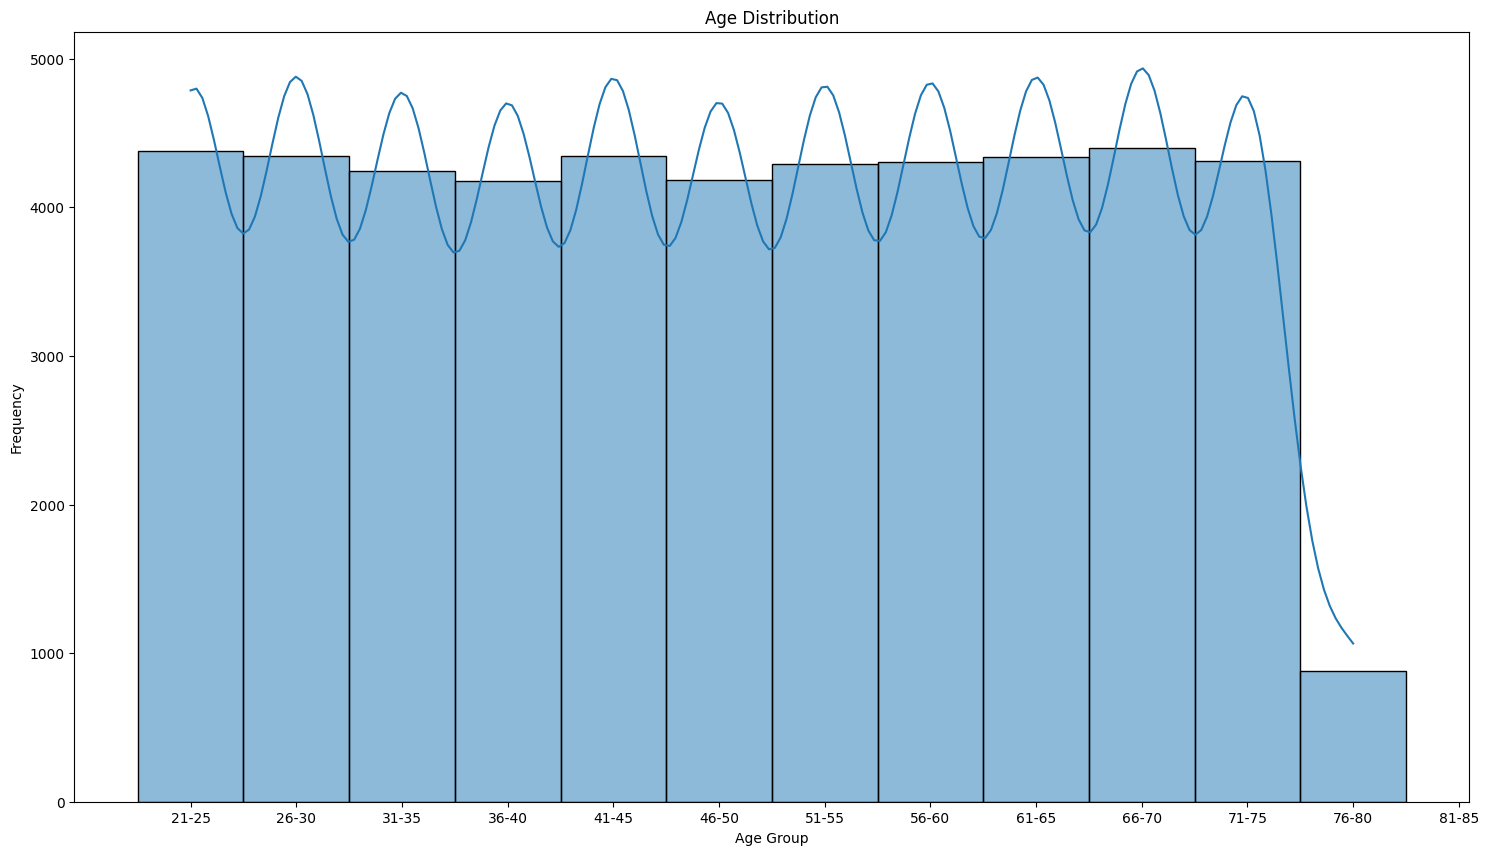

In [20]:
# Convert 'Birthdate' to datetime
customer_transactions['Birthdate'] = pd.to_datetime(customer_transactions['Birthdate'])

# Calculate age
current_date = pd.Timestamp.now()

customer_transactions['Age'] = (current_date - customer_transactions['Birthdate']).dt.days // 365  # Calculate age in years

# Define age bins and labels
age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 100]

age_labels = ['21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95']

# Apply age grouping
customer_transactions['AgeGroup'] = pd.cut(customer_transactions['Age'], bins=age_bins, labels=age_labels, right=False)

# Histogram
plt.figure(figsize=(18, 10))

sns.histplot(data=customer_transactions, x='AgeGroup', kde=True)

plt.title('Age Distribution')

plt.xlabel('Age Group')

plt.ylabel('Frequency')

plt.show()

#### UNIVARIATE ANALYSIS

In [ ]:
# Create a scatter plot

#plt.scatter(customer_transactions['Date'], customer_transactions['AgeGroup'])
#plt.xlabel('Gender')

#plt.ylabel('AgeGroup')
#plt.title('Scatter Plot of Variable1 vs. Variable2')
#plt.show()

In [ ]:
# Calculate the correlation coefficient
correlation = customer_transactions['AgeGroup'].corr(customer_transactions['Gender'])
print(f'Correlation coefficient: {correlation}')

In [ ]:
# Summary statistics
summary_stats = customer_transactions['Birthdate'].describe()
print(summary_stats)

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=customer_transactions, x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 8))
sns.boxplot(data=customer_transactions['Birthdate'], x='Age')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()